In [1]:
import numpy as np
import h5py as hp
import seaborn as sbs
from matplotlib import pyplot as plt
from postprocessing_funcs import *
import PyNAFF as pnf

In [2]:
sbs.set(rc={'figure.figsize':(8.3,5.2),
            'text.usetex':True,
           'font.family':'serif',
           'font.size':20,
           'axes.linewidth':2,
           'lines.linewidth':3,
           'legend.fontsize':16,
           'legend.numpoints':1,},
        style='white',
        palette='colorblind',
        context='talk')

In [8]:
# folder = '/home/vgubaidulin/PhD/Data/Stability_scans/pelens_test/'
folder = '/home/vgubaidulin/PhD/Data_server/Stability_scans/FCC/pelens/'
real = 0.000
imag = 0.0001
mean_x, mean_xp, epsn_x, sigma_x, n_turns = get_bunch_data(real, imag, folder)

OSError: Unable to open file (unable to open file: name = '/home/vgubaidulin/PhD/Data_server/Stability_scans/FCC/pelens/BM(dQre=0.000,dQim=1.000).h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

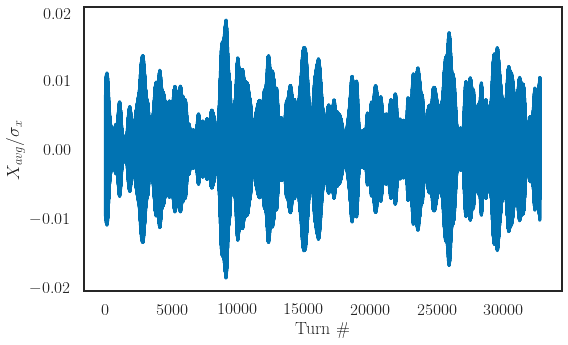

In [4]:
plt.plot(range(n_turns), mean_x/sigma_x)
plt.xlabel('Turn \#')
plt.ylabel('$X_{avg}/\sigma_x$')
plt.tight_layout()
plt.show()

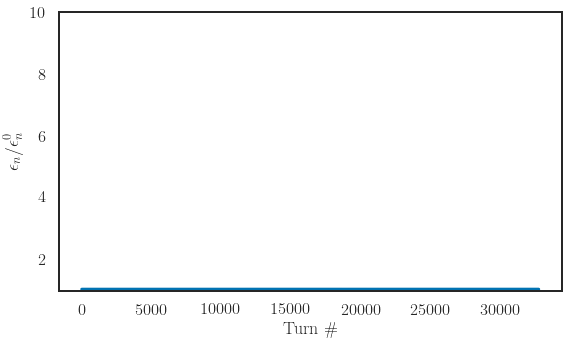

In [5]:
plt.plot(range(n_turns), epsn_x/epsn_x[0])
plt.xlabel('Turn \#')
plt.ylabel('$\epsilon_{n}/\epsilon^{0}_{n}$')
plt.ylim(0.95, 10)
plt.tight_layout()
plt.show()

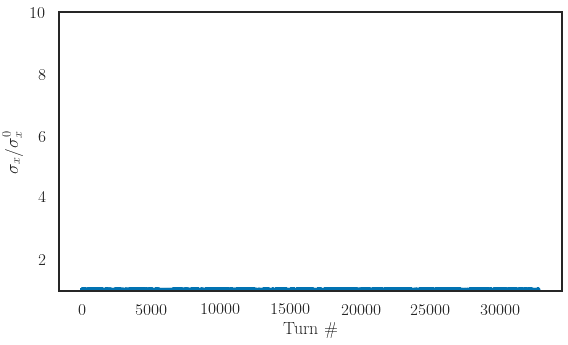

In [6]:
plt.plot(range(n_turns), sigma_x/sigma_x[0])
plt.xlabel('Turn \#')
plt.ylabel('$\sigma_{x}/\sigma^{0}_{x}$')
plt.ylim(0.95, 10)
plt.tight_layout()
plt.show()

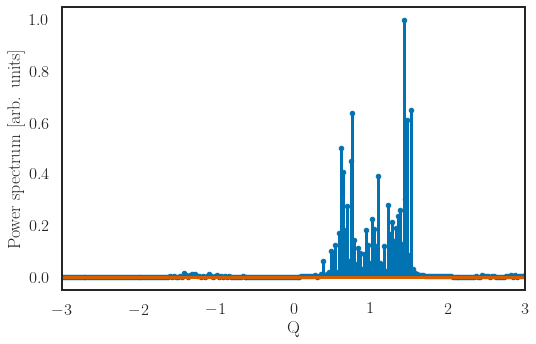

In [7]:
fft_x = np.fft.rfft(mean_x)
Q_s = 1.2e-3
fft_freq = np.fft.rfftfreq(mean_x.shape[0])
power = abs(fft_x)**2
plt.stem((fft_freq-0.31)/Q_s, power/(max(power)), use_line_collection=True, markerfmt='.', linefmt='-')
plt.xlabel('Q')
plt.ylabel('Power spectrum [arb. units]')
delta = 3
plt.xlim(-delta, +delta)
plt.show()